# Oscilador Armónico con SciPy


## 1. Oscilador Armónico Simple

La fuerza restauradora en un péndulo simple se puede expresar como
$
F_{\theta} = -mg\sin(\theta)
$

Se usa la aproximación para ángulos pequeños $\sin(\theta) \approx \theta$. De manera que la ecuación de movimiento se expresa como:

$
\begin{equation}
    \ddot \theta = -\frac{g}{l}\theta
\end{equation}
$

Cuya solución analítica tiene la forma:
$$
\theta = \theta_0 \sin(\Omega t + \phi)
$$

donde $\Omega = \sqrt{g/l}$, $\theta_0$ es la amplitud y $\phi$ la fase.

Ahora se considera un enfoque numérico al problema. Para resolver la ecuación diferencial de segundo orden se transforma en un sistema de dos ecuaciones de primer orden:

\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta\\
    \dot \theta &= \omega
\end{cases}
\end{align}

### Diagrama de fase

* Es un gráfico de $\theta$ contra $\omega$. 
* Desde el punto de vista dinámico, las variables $\theta$ y $\omega$ determinan el estado del sistema. Por lo tanto, se pude considerar que $\theta$ y $\omega$ representan las coordenadas de un punto en un _espacio de fase_. 
* La evolución temporal del sistema se representa en este gráfico como una trayectoria. 
* Cada set de condiciones iniciales determinan una trayectoria distinta.
* Al conjunto de todas las posibles trayectorias del sistema se le conoce como el _diagrama de fase_ del oscilador armónico.

### Para resolver el sistema de ecuaciones de hace uso de `scipy.integrate.solve_ivp()`

In [23]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [24]:
# Se establece un rango de t, de 0 a 20 en 10000 steps
t = np.linspace(0,20,100000)

# Se define omega cuadrado, que es k/m (escenario de un resorte)
omega_cuad = 1

# Se definen los valores iniciales para x y v, en una tupla 
y = [0,1]

In [25]:
# Se define la función f, que toma de parámetros el tiempo y la tupla [x,v]
def f(t,y):
    # La solución corresponde a un vector con v (dx) en la posición 0, y dv en la posición 1
    sol = [y[1],-omega_cuad*y[0]]
    return sol

In [26]:
# Se resuelve la función 
sho = solve_ivp(f, [0,1000], y0 = y, t_eval = t)

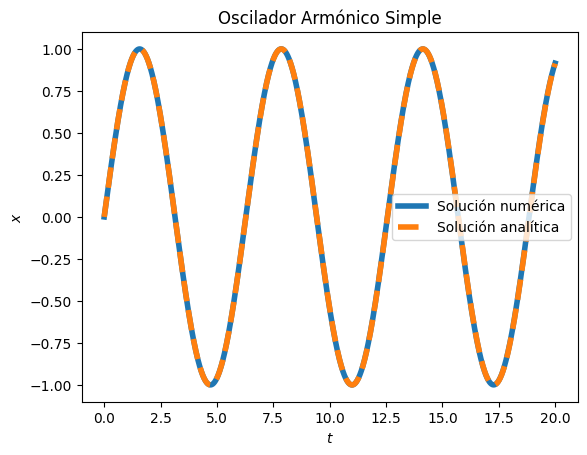

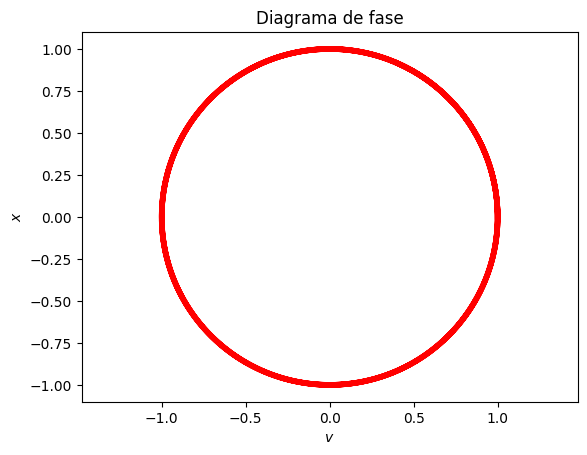

In [27]:
# Se plotean las soluciones numéricas y analíticas
fig, ax = plt.subplots()
plt.plot(t,sho.y[0],linewidth=4,label='Solución numérica')
plt.plot(t,np.sin(t),linestyle='dashed',linewidth=4,label='Solución analítica')
plt.legend(loc='best')
plt.ylabel("$x$")
plt.xlabel("$t$")
plt.title('Oscilador Armónico Simple')

fig, ax1 = plt.subplots()
plt.plot(sho.y[1],sho.y[0],linewidth=4,color="red")
plt.ylabel("$x$")
plt.xlabel("$v$")
plt.axis("equal")
plt.title('Diagrama de fase')
plt.show()

## 2. Oscilador armónico amortiguado

Para caso del oscilador amortiguado se va a tomar en cuenta que la fricción es proporcional a la rapidez del oscilador.

$$
F_{fricción} = -q \dot \theta
$$

Por lo tanto, la ecuación de movimiento se expresa como:
$$
\ddot \theta = -\frac{g}{l}\theta - q \dot \theta
$$

Esta ecuación se expresa como el siguiente sistema de ecuaciones:
\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta -q\omega\\
    \dot \theta &= \omega
\end{cases}
\end{align}

In [28]:
# Se establece un rango de t, de 0 a 20 en 1000 steps
t = np.linspace(0,20,10000)

# Se define omega cuadrado, que es k/m (escenario de un resorte), y q, que es el factor de amortiguamiento
omega_cuad = 10
q = 0.5

# Se definen los valores iniciales para x y v, en una tupla
y = [0,1]

In [29]:
# Se define la función f, que toma de parámetros el tiempo y la tupla [x,v]
def f(t,y):
    # La solución corresponde a un vector con v (dx) en la posición 0, y dv en la posición 1
    sol = [y[1],-q*y[1]-omega_cuad*y[0]]
    return sol

In [30]:
# Se resuelve la función 
sho = solve_ivp(f, [0,1000], y0 = y, t_eval = t)

# Se define la resolución teórica
amortiguada = 1/np.sqrt(omega_cuad)*np.exp(-q/2*t)*np.sin(np.sqrt(omega_cuad)*t)

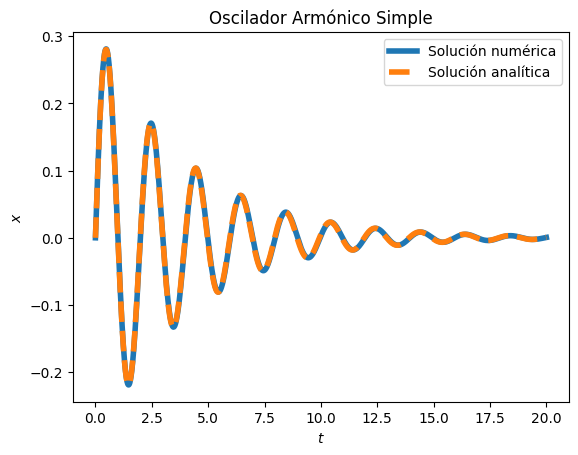

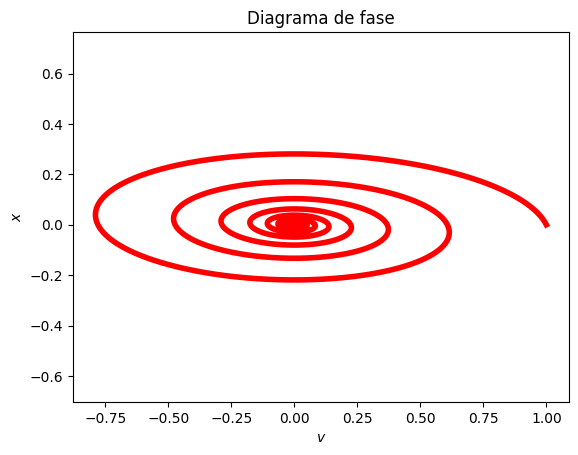

In [31]:
fig, ax = plt.subplots()
plt.plot(t,sho.y[0],linewidth=4,label='Solución numérica')
plt.plot(t, amortiguada,linestyle='dashed',linewidth=4,label='Solución analítica')
plt.legend(loc='best')
plt.ylabel("$x$")
plt.xlabel("$t$")
plt.title('Oscilador Armónico Simple')

fig, ax1 = plt.subplots()
plt.plot(sho.y[1],sho.y[0],linewidth=4,color="red")
plt.ylabel("$x$")
plt.xlabel("$v$")
plt.axis("equal")
plt.title('Diagrama de fase')

plt.show()